# Multiple Linear Regression


In [90]:
import tensorflow as tf
import sklearn
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import LabelEncoder


# Dataset:
Using data mining to predict secondary school student performance
By P. Cortez, A. M. G. Silva. 2008

Published in Proceedings of 5th Annual Future Business Technology Conference
https://archive.ics.uci.edu/dataset/320/student+performance

In [91]:
df = pd.read_csv("/home/mthobisi/Downloads/student+performance/student/student-mat.csv", delimiter=';')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [92]:
#convert the categorical features into numerical 
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Check correlations with the target variable
corr_matrix = df_encoded.corr()
target_corr = corr_matrix['G3'].sort_values(ascending=False)
print(target_corr)


G3                   1.000000
G2                   0.904868
G1                   0.801468
Medu                 0.217147
higher_yes           0.182465
Fedu                 0.152457
romantic_no          0.129970
Mjob_health          0.116158
address_U            0.105756
sex_M                0.103456
paid_yes             0.101996
internet_yes         0.098483
studytime            0.097820
reason_reputation    0.095692
Fjob_teacher         0.095374
schoolsup_no         0.082788
famsize_LE3          0.081407
Mjob_services        0.078429
Pstatus_A            0.058009
Mjob_teacher         0.057712
Fjob_health          0.057111
reason_other         0.052008
nursery_yes          0.051568
famrel               0.051363
school_GP            0.045017
famsup_no            0.039157
absences             0.034247
guardian_father      0.032493
guardian_mother      0.022338
activities_yes       0.016100
freetime             0.011307
Fjob_at_home        -0.013385
activities_no       -0.016100
Fjob_servi

In [93]:
#eliminating the features with low correlation
df_encoded = df.iloc[:, -3:]

df_encoded

,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10
...,...,...,...
390,9,9,9
391,14,16,16
392,10,8,7
393,11,12,10


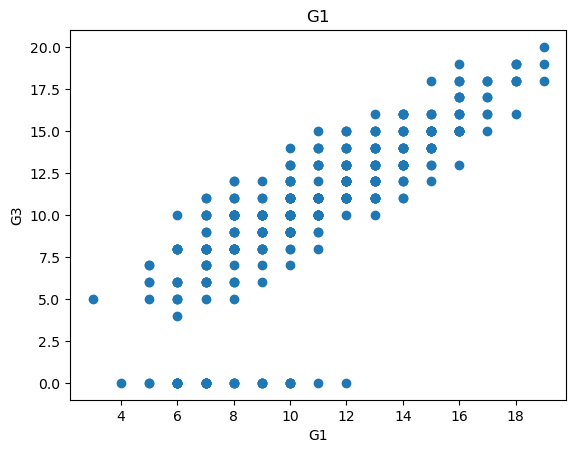

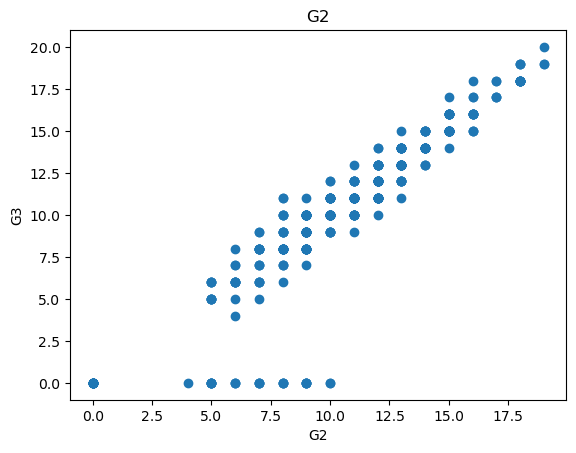

In [94]:
#scttered plot of the of all the features vs target 
for label in df_encoded.columns[:-1]:
    plt.scatter(df_encoded[label], df_encoded["G3"])
    plt.title(label)
    plt.ylabel("G3")
    plt.xlabel(label)
    plt.show()


In [95]:
# Separate features and target from training data
X = df.drop(columns=['G3'])  # Features
y = df['G3']  # Target

# Train, Validate and Test data

In [96]:
from sklearn.preprocessing import OneHotEncoder


# Split the data into training and testing sets (test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize OneHotEncoder (handle_unknown='ignore' to handle new categories in test data)
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform on training data
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])

# Transform on testing data (only transform, don't fit again to maintain consistency)
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Convert sparse matrix to dense array if needed
X_train_encoded = X_train_encoded.toarray()
X_test_encoded = X_test_encoded.toarray()

# Concatenate encoded features with numerical features
X_train_processed = np.concatenate((X_train_encoded, X_train.drop(categorical_columns, axis=1)), axis=1)
X_test_processed = np.concatenate((X_test_encoded, X_test.drop(categorical_columns, axis=1)), axis=1)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_processed, y_train)

# Predict on testing set
y_test_pred = model.predict(X_test_processed)

#evaluate the model
rmse = root_mean_squared_error(y_test, y_test_pred)

print(f'Testing RMSE: {rmse}')

Testing RMSE: 2.3783697847961367


In [97]:
from sklearn.metrics import r2_score

# Calculate R^2 score
r2 = r2_score(y_test, y_test_pred)
print(f'R^2 Score on Test Set: {r2}')

R^2 Score on Test Set: 0.7241341236974022
